In [1]:
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.config import get_cfg
from fvcore.common.timer import Timer

import cv2
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"


In [27]:
cfg = get_cfg()
# cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file("cfg/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # only has one class (ballon)
# cfg.MODEL.WEIGHTS="output/model_final_11.pth"
cfg.MODEL.WEIGHTS="output/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 # or 0.7
predictor = DefaultPredictor(cfg)


0.235079871956259


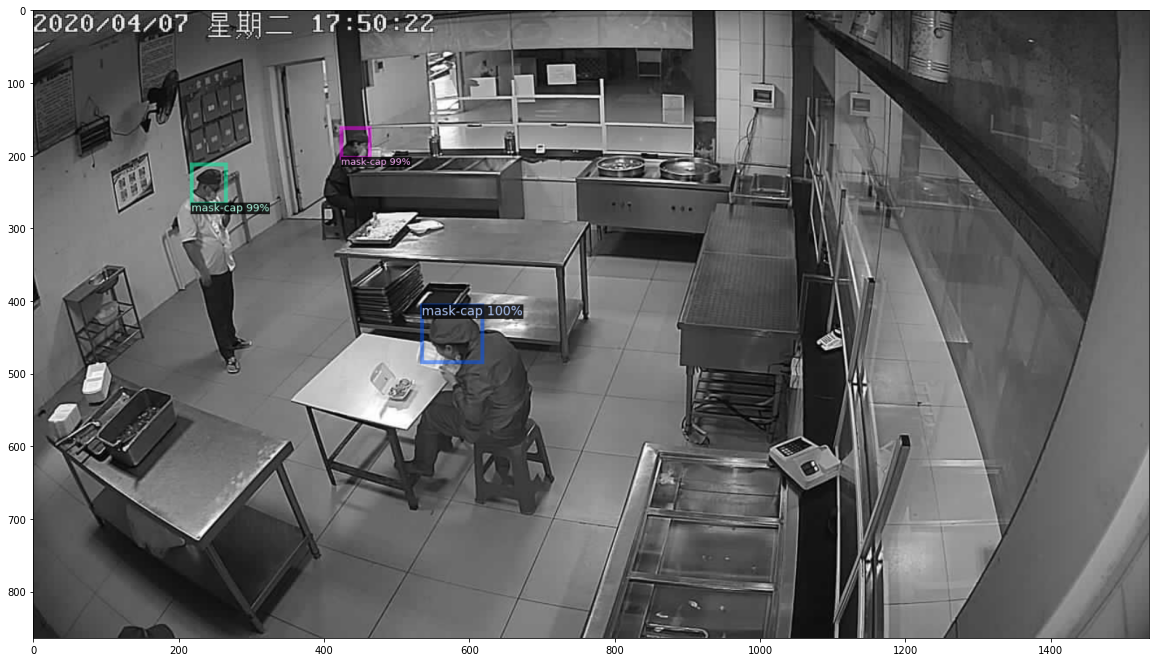

In [28]:
im = cv2.imread("/home/yuanpu/chefCap/data/val/JPEGImages/xxxxxxxxxxxxx-xxxxxxxxxx.jpg")
mtct=MetadataCatalog.get('chefCap_val')
mtct.set(thing_classes=['face-head', 'mask-head', 'face-cap', 'mask-cap'])
v = Visualizer(im[:, :, ::-1], metadata=mtct, scale=1.2)
v._default_font_size=18
t1=Timer()
outputs = predictor(im)
print(t1.seconds())
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,20))
plt.imshow(v.get_image()[:, :, ::-1])

In [25]:
import cv2,glob,os
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
import numpy as np
from fvcore.common.file_io import PathManager
from detectron2.data import MetadataCatalog
import xml.etree.ElementTree as ET
import matplotlib.gridspec as gridspec
data_dir='/home/yuanpu/chefCap/data/train/20200526/3-201-PascalVOC-export'
class_names={1:'face-head',
2:'mask-head',
3:'face-cap',
4:'mask-cap',
5:'uniform',
6:'non-uniform'}
class_names_id={'face-head':1,
'mask-head':2,
'face-cap':3,
'mask-cap':4,
'uniform':5,
'non-uniform':6}
#Annotations JPEGImages
np.info(Visualizer.draw_box)#draw_box(self, box_coord, alpha=0.5, edge_color='g', line_style='-')

 draw_box(self, box_coord, alpha=0.5, edge_color='g', line_style='-')

Args:
    box_coord (tuple): a tuple containing x0, y0, x1, y1 coordinates, where x0 and y0
        are the coordinates of the image's top left corner. x1 and y1 are the
        coordinates of the image's bottom right corner.
    alpha (float): blending efficient. Smaller values lead to more transparent masks.
    edge_color: color of the outline of the box. Refer to `matplotlib.colors`
        for full list of formats that are accepted.
    line_style (string): the string to use to create the outline of the boxes.

Returns:
    output (VisImage): image object with box drawn.


In [9]:
image_names=glob.glob(os.path.join(',',data_dir,'JPEGImages','*.jpg'))
with PathManager.open(os.path.join(',',data_dir,'file_id.txt'),'w') as fid:
    for f in list(map(str.strip,image_names)):
        ff=f.split("/")[-1].split(".")[0]
        fid.write(ff+'\n')

In [97]:
nrows,ncols=8,2
# image_name=image_names[40]
# ann_name=image_name.replace("JPEGImages","Annotations").replace("jpg","xml")
mtct=MetadataCatalog.get('chefCap_0526')
mtct.set(thing_classes=[x for x in class_names.values()])
plt.figure(figsize=(30,30))
gs1 = gridspec.GridSpec(nrows, ncols)
gs1.update(wspace=0., hspace=0.) # set the spacing between axes. 
for icount,image_name in enumerate(image_names[:nrows*ncols]):
    ann_name=image_name.replace("JPEGImages","Annotations").replace("jpg","xml")
    with PathManager.open(ann_name) as fid:
        tree = ET.parse(fid)
        filename_ = tree.find("filename").text.strip()
        width_ = tree.find("size").find("width").text.strip()
        height_ = tree.find("size").find("height").text.strip()
        depth_ = tree.find("size").find("depth").text.strip()
        im=cv2.imread(image_name)
        v = Visualizer(im[:, :, ::-1], metadata=mtct, scale=1.2)
#         v._default_font_size=18
        for obj in tree.findall("object"):
            oclassid_ = class_names_id[obj.find("name").text.strip()]
            bbox = obj.find("bndbox")
            xmin=float(bbox.find("xmin").text)
            ymin=float(bbox.find("ymin").text)
            xmax=float(bbox.find("xmax").text)
            ymax=float(bbox.find("ymax").text)
            # v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
            vi=v.draw_box((xmin,ymin,xmax,ymax), alpha=0.5, edge_color='g', line_style='-')
#         fig.imshow(vi.get_image()[:, :, ::-1])
#         ax1 = plt.subplot(nrows,ncols,icount+1)
#         ax1 = plt.subplot(gs1[icount])
#         plt.axis('on')
#         ax1.set_xticklabels([])
#         ax1.set_yticklabels([])
#         ax1.set_aspect('equal')
#         plt.imshow(vi.get_image()[:, :, ::-1])





<Figure size 2160x2160 with 0 Axes>